In [1]:

# STEP 1

# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
 
    
# import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')), "\n")

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



Number of GPUs Available:  1 



In [22]:
import splitfolders

splitfolders.ratio("data", output="output2", seed=1994, ratio=(.9, .1), group_prefix=None)

In [12]:
# batch_size = 32
# img_height = 140  
# img_width = 140
train_data_dir = 'D:\\recep_roof_fine_tune\\output\\train' ####################################
test_data_dir = 'D:\\recep_roof_fine_tune\\output\\test'

num_classes = 6
batch_size = 64
img_height = 140
img_width = 140
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=0.1,
  zoom_range=0.1,    
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,
  validation_split=0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
  train_data_dir,
  subset="training",
  seed=94,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode='categorical')
val_ds = train_datagen.flow_from_directory(
  train_data_dir,
  subset="validation",
  seed=94,
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode='categorical')
test_ds = test_datagen.flow_from_directory(
    test_data_dir,
    seed=94,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# print("")

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# print("")

# class_names = train_ds.class_names
# print('Class names:', class_names, "\n")

# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print('Min pixel value of the first image:',np.min(first_image),"\n" 'Max pixel value of the first image:',np.max(first_image),'\n') 

# num_classes = 6

# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", ####################################
#                                                  #"horizontal",
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

# model = Sequential([
#   data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(64, 3, padding='same', activation='relu'), ####################################
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, padding='same', activation='relu'), ####################################
#   layers.MaxPooling2D(),
#   layers.Conv2D(256, 3, padding='same', activation='relu'), ####################################
#   layers.MaxPooling2D(),
#   layers.Dropout(0.5),
#   layers.Flatten(),
#   layers.Dense(256, activation='relu'), ####################################
#   layers.Dense(num_classes)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

# #csv_logger = tf.keras.callbacks.CSVLogger('10000_dell.log', separator=' ') ####################################

# epochs = 100
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs,
#   #callbacks=[csv_logger] ####################################
# )

# print("")

epochs_range = range(epochs)
modelhistory = model.history.history

plt.figure(figsize=(12, 12))
plt.plot(epochs_range, modelhistory['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, modelhistory['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs_range, modelhistory['loss'], label='Training Loss')
plt.plot(epochs_range, modelhistory['val_loss'], label='Validation Loss')
plt.legend(loc='upper left', fontsize=('xx-large'))
plt.xlabel('Epochs', fontsize=('27'))
plt.ylabel('Value', fontsize=('27'))
plt.title('Training and Validation Results', fontsize=('27'))
plt.savefig("mehmetabis_rc_model.jpeg", dpi=600) ####################################
plt.show()

Found 7200 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Found 1000 images belonging to 6 classes.


In [86]:
model = Sequential([
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(140, 140, 3)), ####################################
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'), ####################################
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'), ####################################
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
#   layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'), ####################################
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


csv_logger = tf.keras.callbacks.CSVLogger('10000_mehmet_abi.log', separator=' ') ####################################

epochs = 150
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])
model.save('mehmet_abis_model')

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_272 (Conv2D)          (None, 140, 140, 64)      1792      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 70, 70, 64)        0         
_________________________________________________________________
conv2d_273 (Conv2D)          (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_274 (Conv2D)          (None, 35, 35, 256)       295168    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 17, 17, 256)     

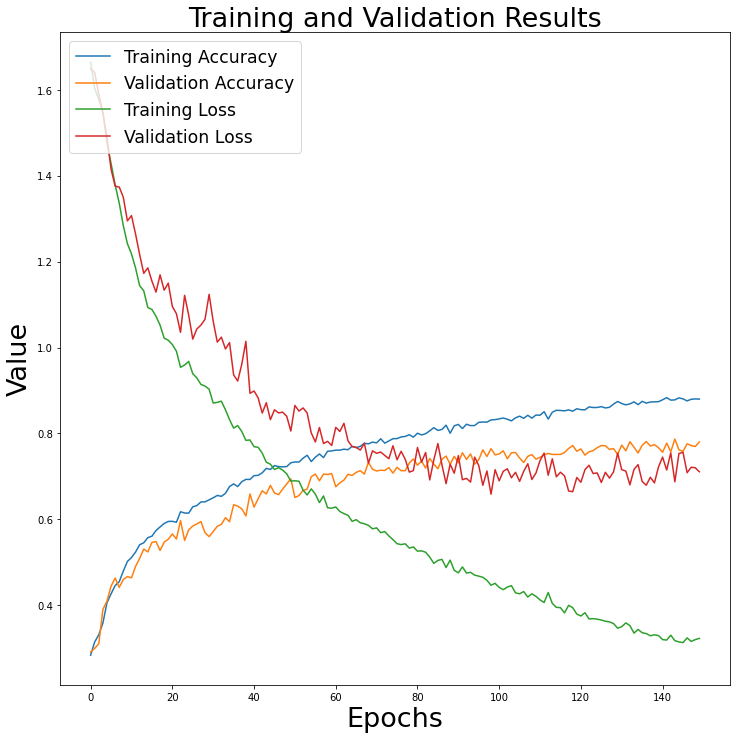

In [87]:
epochs_range = range(epochs)
modelhistory = history.history

plt.figure(figsize=(12, 12))
plt.plot(epochs_range, modelhistory['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, modelhistory['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs_range, modelhistory['loss'], label='Training Loss')
plt.plot(epochs_range, modelhistory['val_loss'], label='Validation Loss')
plt.legend(loc='upper left', fontsize=('xx-large'))
plt.xlabel('Epochs', fontsize=('27'))
plt.ylabel('Value', fontsize=('27'))
plt.title('Training and Validation Results', fontsize=('27'))
plt.savefig("mehmetabis_model.jpeg", dpi=600) ####################################
plt.show()

In [89]:
from tensorflow.keras.optimizers import SGD, Adam
model = Sequential([
  layers.Conv2D(32, 3, padding='same', use_bias=False, input_shape=(140, 140, 3)), ####################################
  layers.BatchNormalization(momentum=0.01),
  layers.Activation('relu'),  
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), ####################################
  layers.Conv2D(64, 3, padding='same', use_bias=False), ####################################
  layers.BatchNormalization(momentum=0.01),
  layers.Activation('relu'),     
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'), ####################################
  layers.Conv2D(128, 3, padding='same', use_bias=False), ####################################
  layers.BatchNormalization(momentum=0.01),
  layers.Activation('relu'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

# model.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=Adam(learning_rate=3e-4), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

csv_logger = tf.keras.callbacks.CSVLogger('mehmet_abis_and_rc.log', separator=' ') ####################################

epochs = 150
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])
model.save('mehmet_abis_and_rc_model')

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_280 (Conv2D)          (None, 140, 140, 32)      864       
_________________________________________________________________
batch_normalization_233 (Bat (None, 140, 140, 32)      128       
_________________________________________________________________
activation_216 (Activation)  (None, 140, 140, 32)      0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 70, 70, 32)        0         
_________________________________________________________________
conv2d_281 (Conv2D)          (None, 70, 70, 64)        18496     
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 70, 70, 64)        36864     
_________________________________________________________________
batch_normalization_234 (Bat (None, 70, 70, 64)      

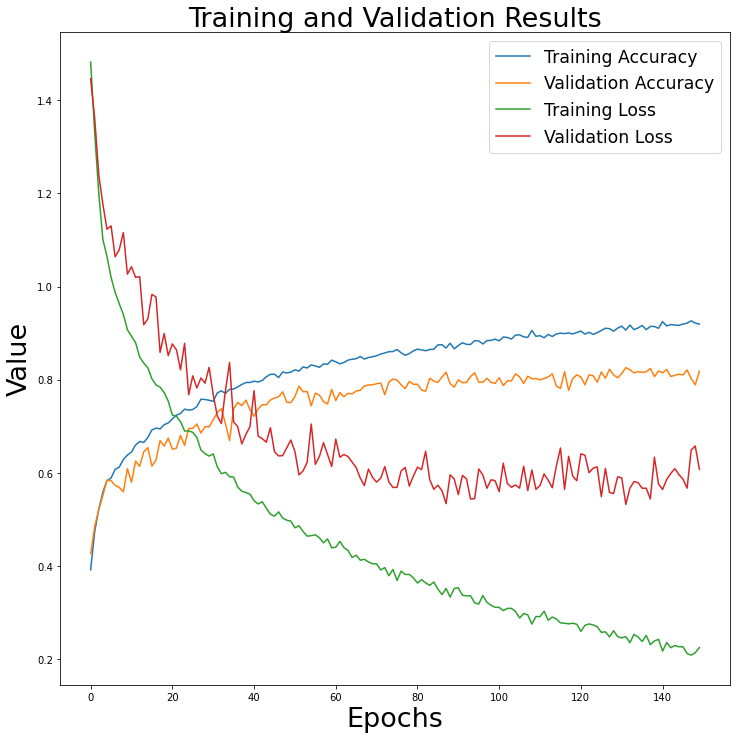

In [91]:

epochs_range = range(epochs)
modelhistory = history.history

plt.figure(figsize=(12, 12))
plt.plot(epochs_range, modelhistory['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, modelhistory['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs_range, modelhistory['loss'], label='Training Loss')
plt.plot(epochs_range, modelhistory['val_loss'], label='Validation Loss')
plt.legend(loc='upper right', fontsize=('xx-large'))
plt.xlabel('Epochs', fontsize=('27'))
plt.ylabel('Value', fontsize=('27'))
plt.title('Training and Validation Results', fontsize=('27'))
plt.savefig("mehmetabis_rc_model.jpeg", dpi=600) ####################################
plt.show()

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler

# STEP 2
# ------------------------- VGG16 
VGG16_net = VGG16(weights='imagenet', include_top=False, input_shape=(140, 140, 3))

VGG16_net.trainable=False
def classifier():
    x = VGG16_net.output
    x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x) 
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64,activation='relu')(x)  
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    return Model(VGG16_net.input, outputs)

# VGG16
model = classifier()
for layer in VGG16_net.layers:
    layer.trainable = False


# model.compile(
#         optimizer='rmsprop', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"]
#     ) 

model.compile(
        optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"]
    ) 


# lr_sched = lr_scheduler()
csv_logger = tf.keras.callbacks.CSVLogger('rc_vgg16_cce.log', separator=' ')
# monitor_val = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
# model_check = ModelCheckpoint('rc_vgg16.h5', monitor= 'val_accuracy', mode= 'max', save_best_only=True, verbose= 1)
epochs = 10
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

Epoch 1/10
112/112 [==============================] - 58s 515ms/step - loss: 1.4798 - accuracy: 0.3899 - val_loss: 0.9791 - val_accuracy: 0.6473
Epoch 2/10
112/112 [==============================] - 57s 513ms/step - loss: 0.9770 - accuracy: 0.6273 - val_loss: 0.8845 - val_accuracy: 0.6613
Epoch 3/10
112/112 [==============================] - 54s 483ms/step - loss: 0.8754 - accuracy: 0.6649 - val_loss: 0.8060 - val_accuracy: 0.6842
Epoch 4/10
112/112 [==============================] - 54s 486ms/step - loss: 0.8080 - accuracy: 0.6843 - val_loss: 0.8064 - val_accuracy: 0.6853
Epoch 5/10
112/112 [==============================] - 55s 489ms/step - loss: 0.7651 - accuracy: 0.7028 - val_loss: 0.7505 - val_accuracy: 0.7165
Epoch 6/10
112/112 [==============================] - 54s 483ms/step - loss: 0.7502 - accuracy: 0.7219 - val_loss: 0.7212 - val_accuracy: 0.7333
Epoch 7/10
112/112 [==============================] - 54s 486ms/step - loss: 0.6906 - accuracy: 0.7458 - val_loss: 0.7450 - val_ac

In [16]:
for layer in VGG16_net.layers[15:]:
    layer.trainable=True
from tensorflow.keras.optimizers import SGD
epochs = 50
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])
model.save("VGG16_cce_final")

Epoch 1/50
112/112 [==============================] - 56s 493ms/step - loss: 0.6297 - accuracy: 0.7607 - val_loss: 0.6016 - val_accuracy: 0.7835
Epoch 2/50
112/112 [==============================] - 57s 504ms/step - loss: 0.5567 - accuracy: 0.7941 - val_loss: 0.5776 - val_accuracy: 0.7963
Epoch 3/50
112/112 [==============================] - 56s 496ms/step - loss: 0.5297 - accuracy: 0.8087 - val_loss: 0.5722 - val_accuracy: 0.7852
Epoch 4/50
112/112 [==============================] - 56s 498ms/step - loss: 0.4880 - accuracy: 0.8206 - val_loss: 0.5726 - val_accuracy: 0.7868
Epoch 5/50
112/112 [==============================] - 55s 492ms/step - loss: 0.4664 - accuracy: 0.8312 - val_loss: 0.5511 - val_accuracy: 0.7974
Epoch 6/50
112/112 [==============================] - 55s 495ms/step - loss: 0.4677 - accuracy: 0.8297 - val_loss: 0.5482 - val_accuracy: 0.8097
Epoch 7/50
112/112 [==============================] - 56s 499ms/step - loss: 0.4577 - accuracy: 0.8338 - val_loss: 0.5066 - val_ac

In [17]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Model

model_inc = InceptionV3(include_top=False, input_shape=(140, 140, 3), weights='imagenet')
x = model_inc.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)
model = Model(model_inc.input, output)

for layer in model_inc.layers:
    layer.trainable = False


model.compile(
        optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"]
    )   





In [18]:
#INCEPTIONV3

csv_logger = tf.keras.callbacks.CSVLogger('rc_inceptionv3_cce.log', separator=' ')
monitor_val = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
model_check = ModelCheckpoint('rc_inceptionv3_cce.h5', monitor= 'val_accuracy', mode= 'max', save_best_only=True, verbose= 1)
epochs = 10
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

C:\Users\proje\anaconda3\envs\rc_tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
112/112 [==============================] - 59s 489ms/step - loss: 1.7097 - accuracy: 0.4148 - val_loss: 0.9196 - val_accuracy: 0.6468
Epoch 2/10
112/112 [==============================] - 54s 478ms/step - loss: 1.0191 - accuracy: 0.6212 - val_loss: 0.8988 - val_accuracy: 0.6456
Epoch 3/10
112/112 [==============================] - 54s 478ms/step - loss: 0.9445 - accuracy: 0.6432 - val_loss: 0.8379 - val_accuracy: 0.6657
Epoch 4/10
112/112 [==============================] - 54s 481ms/step - loss: 0.8529 - accuracy: 0.6832 - val_loss: 0.7923 - val_accuracy: 0.6970
Epoch 5/10
112/112 [==============================] - 54s 482ms/step - loss: 0.8099 - accuracy: 0.6882 - val_loss: 0.8028 - val_accuracy: 0.7020
Epoch 6/10
112/112 [==============================] - 54s 481ms/step - loss: 0.7771 - accuracy: 0.7128 - val_loss: 0.7688 - val_accuracy: 0.7076
Epoch 7/10
112/112 [==============================] - 54s 485ms/step - loss: 0.7532 - accuracy: 0.7231 - val_loss: 0.6994 - val_ac

In [19]:
# INCEPTIONV3
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True
from tensorflow.keras.optimizers import SGD
epochs = 50
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

Epoch 1/50
112/112 [==============================] - 61s 504ms/step - loss: 1.3184 - accuracy: 0.5127 - val_loss: 0.8124 - val_accuracy: 0.6970
Epoch 2/50
112/112 [==============================] - 55s 491ms/step - loss: 0.9360 - accuracy: 0.6346 - val_loss: 0.8085 - val_accuracy: 0.6998
Epoch 3/50
112/112 [==============================] - 55s 491ms/step - loss: 0.8619 - accuracy: 0.6690 - val_loss: 0.7846 - val_accuracy: 0.7238
Epoch 4/50
112/112 [==============================] - 56s 496ms/step - loss: 0.8040 - accuracy: 0.7042 - val_loss: 0.7665 - val_accuracy: 0.7148
Epoch 5/50
112/112 [==============================] - 55s 491ms/step - loss: 0.7559 - accuracy: 0.7217 - val_loss: 0.7364 - val_accuracy: 0.7411
Epoch 6/50
112/112 [==============================] - 55s 493ms/step - loss: 0.7254 - accuracy: 0.7358 - val_loss: 0.7484 - val_accuracy: 0.7232
Epoch 7/50
112/112 [==============================] - 55s 493ms/step - loss: 0.6837 - accuracy: 0.7492 - val_loss: 0.7233 - val_ac

In [20]:
model.save("inceptionv3_cce_final")

INFO:tensorflow:Assets written to: inceptionv3_cce_final\assets


In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
# import h5py
# STEP 2
# ------------------------- RESNET50
resnet50_net = ResNet50(weights='imagenet', include_top=False, input_shape=(140, 140, 3))

for layer in resnet50_net.layers:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = False
def classifier():
    x = resnet50_net.output
    x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x) 
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64,activation='relu')(x)  
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    return Model(resnet50_net.input, outputs)

# VGG16
model = classifier()

model.compile(
        optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"]
    ) 


lr_sched = lr_scheduler()
csv_logger = tf.keras.callbacks.CSVLogger('rc_resnet50_cce.log', separator=' ')
monitor_val = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
model_check = ModelCheckpoint('rc_resnet50_cce.h5', monitor= 'val_accuracy', mode= 'max', save_best_only=True, verbose= 1)
epochs = 10
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

Epoch 1/10
112/112 [==============================] - 61s 487ms/step - loss: 1.5613 - accuracy: 0.4118 - val_loss: 3.2282 - val_accuracy: 0.1713
Epoch 2/10
112/112 [==============================] - 53s 476ms/step - loss: 0.8865 - accuracy: 0.6563 - val_loss: 4.8793 - val_accuracy: 0.1747
Epoch 3/10
112/112 [==============================] - 53s 469ms/step - loss: 0.7783 - accuracy: 0.7161 - val_loss: 5.8900 - val_accuracy: 0.1730
Epoch 4/10
112/112 [==============================] - 54s 477ms/step - loss: 0.6891 - accuracy: 0.7470 - val_loss: 5.0670 - val_accuracy: 0.1730
Epoch 5/10
112/112 [==============================] - 53s 473ms/step - loss: 0.6023 - accuracy: 0.7770 - val_loss: 2.3587 - val_accuracy: 0.3259
Epoch 6/10
112/112 [==============================] - 53s 473ms/step - loss: 0.5510 - accuracy: 0.8003 - val_loss: 1.2816 - val_accuracy: 0.5257
Epoch 7/10
112/112 [==============================] - 52s 467ms/step - loss: 0.5029 - accuracy: 0.8191 - val_loss: 1.0809 - val_ac

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
# import h5py
# STEP 2
# ------------------------- RESNET50
resnet50_net = ResNet50(weights='imagenet', include_top=False, input_shape=(140, 140, 3))

for layer in resnet50_net.layers:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = False
def classifier():
    x = resnet50_net.output
    x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x) 
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64,activation='relu')(x)  
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    return Model(resnet50_net.input, outputs)

# VGG16
model = classifier()

model.compile(
        optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"]
    ) 


lr_sched = lr_scheduler()
csv_logger = tf.keras.callbacks.CSVLogger('rc_resnet50_cce.log', separator=' ')
monitor_val = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
model_check = ModelCheckpoint('rc_resnet50_cce.h5', monitor= 'val_accuracy', mode= 'max', save_best_only=True, verbose= 1)
epochs = 10
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

In [29]:
# STEP 4 RESNET50
for layer in resnet50_net.layers[165:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True
from tensorflow.keras.optimizers import SGD
epochs = 50
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])
model.save("resnet50_final_cce")

Epoch 1/50
112/112 [==============================] - 59s 488ms/step - loss: 0.3957 - accuracy: 0.8513 - val_loss: 0.5004 - val_accuracy: 0.8259
Epoch 2/50
112/112 [==============================] - 54s 484ms/step - loss: 0.3949 - accuracy: 0.8556 - val_loss: 0.4846 - val_accuracy: 0.8365
Epoch 3/50
112/112 [==============================] - 54s 485ms/step - loss: 0.4054 - accuracy: 0.8517 - val_loss: 0.4808 - val_accuracy: 0.8438
Epoch 4/50
112/112 [==============================] - 54s 485ms/step - loss: 0.3808 - accuracy: 0.8660 - val_loss: 0.4473 - val_accuracy: 0.8477
Epoch 5/50
112/112 [==============================] - 54s 483ms/step - loss: 0.3599 - accuracy: 0.8722 - val_loss: 0.4645 - val_accuracy: 0.8465
Epoch 6/50
112/112 [==============================] - 54s 483ms/step - loss: 0.3721 - accuracy: 0.8693 - val_loss: 0.4464 - val_accuracy: 0.8477
Epoch 7/50
112/112 [==============================] - 54s 479ms/step - loss: 0.3826 - accuracy: 0.8618 - val_loss: 0.4480 - val_ac

In [37]:
# STEP 2
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB4
# ------------------------- EfficientNetB0
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
efficient_net_B0 = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(140, 140, 3), drop_connect_rate=0.4, classes=num_classes)
# efficient_net_B4.trainable = False
for layer in efficient_net_B4.layers:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = False
def classifier():
    x = efficient_net_B4.output
    x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x) 
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64,activation='relu')(x)  
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
    return Model(efficient_net_B4.input, outputs)


model = classifier()

model.compile(
        optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"]
    ) 
lr_sched = lr_scheduler()
csv_logger = tf.keras.callbacks.CSVLogger('rc_efficientnetb4_cce.log', separator=' ')
monitor_val = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
model_check = ModelCheckpoint('rc_efficientnetb4_cce.h5', monitor= 'val_accuracy', mode= 'max', save_best_only=True, verbose= 1)
epochs = 10
nb_train_samples = 7200
nb_validation_samples = 1800
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])

C:\Users\proje\anaconda3\envs\rc_tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
112/112 [==============================] - 92s 646ms/step - loss: 1.4068 - accuracy: 0.4485 - val_loss: 2.2199 - val_accuracy: 0.1914
Epoch 2/10
112/112 [==============================] - 69s 611ms/step - loss: 0.9031 - accuracy: 0.6538 - val_loss: 2.5609 - val_accuracy: 0.2595
Epoch 3/10
112/112 [==============================] - 69s 611ms/step - loss: 0.8223 - accuracy: 0.6954 - val_loss: 2.2328 - val_accuracy: 0.3298
Epoch 4/10
112/112 [==============================] - 69s 611ms/step - loss: 0.7241 - accuracy: 0.7345 - val_loss: 1.5299 - val_accuracy: 0.4727
Epoch 5/10
112/112 [==============================] - 69s 613ms/step - loss: 0.6877 - accuracy: 0.7409 - val_loss: 0.9217 - val_accuracy: 0.6484
Epoch 6/10
112/112 [==============================] - 69s 610ms/step - loss: 0.6427 - accuracy: 0.7578 - val_loss: 0.6752 - val_accuracy: 0.7584
Epoch 7/10
112/112 [==============================] - 69s 611ms/step - loss: 0.5939 - accuracy: 0.7791 - val_loss: 0.5871 - val_ac

In [38]:
# STEP 4
#EfficientNetB3
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

from tensorflow.keras.optimizers import SGD
unfreeze_model(efficient_net_B4)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])


epochs = 50
history = model.fit_generator(
    train_ds,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[csv_logger])
model.save("efficientnetb4_final_cce")

Epoch 1/50
112/112 [==============================] - 81s 603ms/step - loss: 0.4966 - accuracy: 0.8220 - val_loss: 0.5127 - val_accuracy: 0.8114
Epoch 2/50
112/112 [==============================] - 65s 578ms/step - loss: 0.4997 - accuracy: 0.8123 - val_loss: 0.5015 - val_accuracy: 0.8209
Epoch 3/50
112/112 [==============================] - 65s 574ms/step - loss: 0.4821 - accuracy: 0.8296 - val_loss: 0.5096 - val_accuracy: 0.8248
Epoch 4/50
112/112 [==============================] - 65s 575ms/step - loss: 0.5061 - accuracy: 0.8183 - val_loss: 0.5040 - val_accuracy: 0.8259
Epoch 5/50
112/112 [==============================] - 65s 577ms/step - loss: 0.5110 - accuracy: 0.8129 - val_loss: 0.5112 - val_accuracy: 0.8248
Epoch 6/50
112/112 [==============================] - 65s 577ms/step - loss: 0.4944 - accuracy: 0.8224 - val_loss: 0.5043 - val_accuracy: 0.8198
Epoch 7/50
112/112 [==============================] - 65s 575ms/step - loss: 0.5172 - accuracy: 0.8135 - val_loss: 0.5022 - val_ac

In [ ]:

# STEP 4 
# VGG16 
for layer in model.layers[15:]:
    layer.trainable=True
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
        optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"]
    )
# model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
#               loss=tf.keras.losses.sparse_categorical_crossentropy,
#               metrics=['accuracy'])

print(model.summary())
epochs = 100
# history = model.fit_generator(
#   train_ds,
#   steps_per_epoch=train_ds.samples//batch_size,
#   validation_data=val_ds,
#   validation_steps=val_ds.samples//batch_size,
#   epochs=epochs,
#   callbacks=[csv_logger, model_check, monitor_val]
# )
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[csv_logger]
)
model.save("10k_roof_vgg16")

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 140, 140, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 140, 140, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 512)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
top_dropout (Dropout)        (None, 512)               0         
_________________________________________________________________
pred (Dense)                 (None, 6)                 3078

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
    
import matplotlib.pyplot as plt
predictions = model.predict(test_ds)
predictions = np.argmax(predictions, axis=-1)
#print(predictions)

labels =  np.array([]).astype(int)
for image_batch, labels_batch in val_ds:
  labels = np.append(labels, labels_batch.numpy(), axis=-1)  
#print(labels)

confusion_matrix = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
#print(confusion_matrix)

target_names = ['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid'] 
print(classification_report(labels, predictions, target_names=target_names))

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix', fontsize=('13'))
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=target_names).plot(cmap='Blues', ax=ax)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
target_names = ['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid'] 
print(classification_report(labels, predictions, target_names=target_names))

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Confusion Matrix', fontsize=('13'))
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=target_names).plot(cmap='Blues', ax=ax)

In [35]:
model.save("10k_roof_efficientnet")

INFO:tensorflow:Assets written to: 10k_roof_efficientnet\assets


In [36]:
from tensorflow.keras.models import load_model

model_fine_tuned = load_model("10k_roof_efficientnet")

In [38]:
predictions = model_fine_tuned.predict(val_ds)

In [39]:
predictions

array([[4.6690020e-11, 6.7656379e-06, 1.4518179e-07, 1.4679875e-07,
        9.9999249e-01, 5.3191457e-07],
       [1.0000000e+00, 1.6634555e-20, 5.3351159e-19, 7.1290862e-09,
        2.0018280e-16, 9.0826386e-13],
       [9.9999988e-01, 3.6926089e-08, 1.7392946e-12, 3.2443537e-11,
        2.1083013e-10, 1.0640806e-07],
       ...,
       [3.0680602e-07, 2.4978486e-10, 9.9999917e-01, 1.9075842e-10,
        1.2688875e-07, 4.0103066e-07],
       [9.8952484e-01, 2.0616968e-05, 5.2929210e-04, 6.7268265e-05,
        4.4892053e-03, 5.3687692e-03],
       [8.8015451e-28, 1.2368518e-16, 9.9999952e-01, 9.9805657e-11,
        4.5629523e-07, 8.4506471e-14]], dtype=float32)